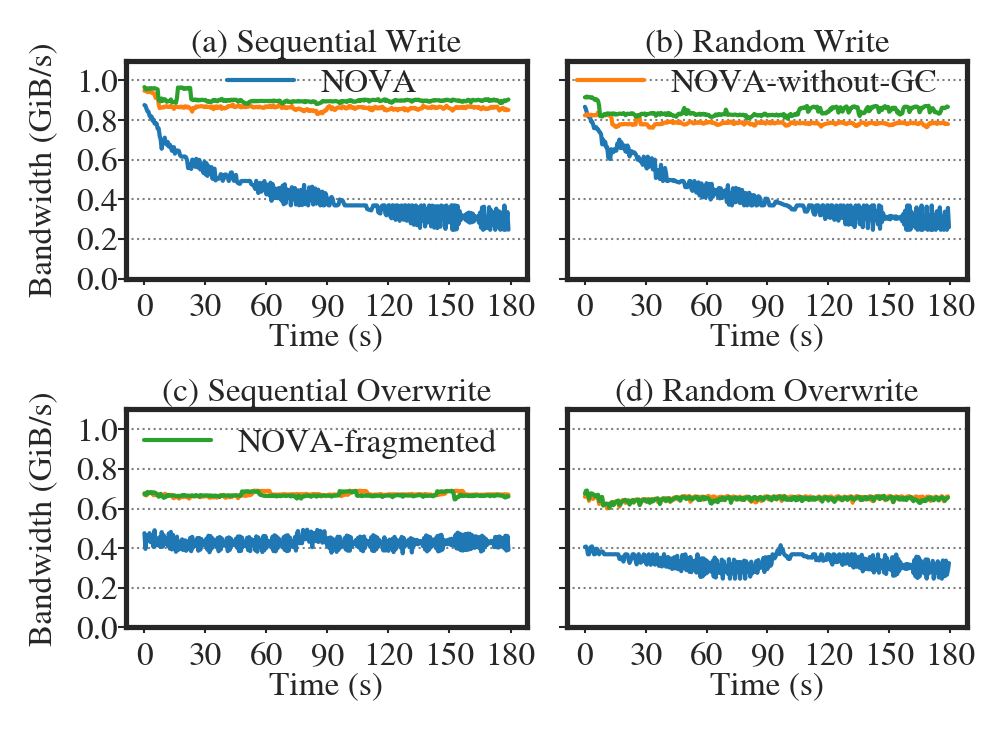

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import glob

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

# matplotlib.rcParams['text.usetex'] = False
# style.use('seaborn-v0_8-white')
# plt.rcParams["axes.grid"] = True
# plt.rcParams["axes.grid.axis"] = "both"
# plt.rcParams["grid.linewidth"] = 0.5
# plt.rcParams["font.family"] = "Nimbus Roman"
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-v0_8-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"  
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["grid.linestyle"] = ':'  
plt.rcParams["grid.color"] = 'gray'
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["font.size"] = 8
pd.options.display.max_columns = None
pd.options.display.max_rows = None

legend_handles = {"NOVA": None, "NOVA-nogc": None, "NOVA-fragment": None}

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH) * 1, cm_to_inch(6)))
workloads = ["sw", "rw", "sow", "row"]  
titles =  ["(a) Sequential Write", "(b) Random Write", "(c) Sequential Overwrite", "(d) Random Overwrite"]
fss = ["NOVA", "NOVA-nogc", "NOVA-fragment"]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    for fs in fss:
        workload = workloads[i]
        dfs = []
        paths = glob.glob(f"performance-table/{fs}/{workload}/*.log")
        for p in paths:
            tmp = pd.read_csv(p, usecols=[0, 1], header=None)
            tmp.iloc[:, 0] = tmp.index.astype(float) * 0.5
            tmp.iloc[:, 1] = tmp.iloc[:, 1] / (1024 * 1024)  # Convert KB/s to GB/s
            dfs.append(tmp)
        df = pd.concat(dfs).groupby(level=0).mean()

        p, = plt.plot(df.iloc[:, 0], df.iloc[:, 1], label=fs, linewidth=1)
        
        if fs in legend_handles:
            legend_handles[fs] = p
        
        plt.title(titles[i], pad=2, fontsize=8)

        plt.ylim(0, 1.1)
        if i == 1 or i == 3:
            plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[])
        else:
            plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
            plt.ylabel("Bandwidth (GiB/s)")
            
        plt.xticks([0, 30, 60, 90, 120, 150, 180])
        plt.xlabel("Time (s)", labelpad=0)
        plt.tick_params(axis='y', pad=0, width=1)
        plt.tick_params(axis='x', pad=2, width=2)

        ax = plt.gca()
        ax.tick_params(axis='y', which='major', length=1, width = 0.5, direction='out', right=False, left=True)
        ax.tick_params(axis='x', which='major', length=1.5, width = 0.5, direction='out', top=False, bottom=True)
        ax.yaxis.set_tick_params(which='major', size=2)

        if i == 0:
            plt.legend([legend_handles["NOVA"]], ['NOVA'], loc='upper right', fontsize=8, frameon=False, bbox_to_anchor=(0.8, 1.1))
        if i == 1:
            plt.legend([legend_handles["NOVA-nogc"]], ['NOVA-without-GC'], loc='upper right', fontsize=8, frameon=False, bbox_to_anchor=(1, 1.1))
        if i == 2:
            plt.legend([legend_handles["NOVA-fragment"]], ['NOVA-fragmented'], loc='upper right', fontsize=8, frameon=False, bbox_to_anchor=(1, 1.05))
        #plt.legend(loc='upper right', fontsize=8, frameon=False)

        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.6, 
        wspace=0.1)

        plt.savefig("Motivation-GC-2.pdf", bbox_inches='tight')

